<a href="https://colab.research.google.com/github/mgnarag/Geology-image-classification/blob/main/Visualizing_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Installing packages and connecting the google drive**

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder

# **2. Preparing the GDrive folder**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Geology (Ate Grass)/2 classes (PPL)"

# **3. Visualize the kernels of the model of choice**

Let's define some functions first

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16, ResNet50

# Function to load the model
def load_model_by_name(model_name, file_path):
    if model_name.lower() == "alexnet":
        return load_model(file_path + '/Models/alex_model')
    elif model_name.lower() == "vgg":
        return load_model(file_path + '/Models/vgg_model')
    elif model_name.lower() == "resnet":
        return load_model(file_path + '/Models/resnet_model')
    else:
        raise ValueError("Model name not recognized. Available options: alexnet, vgg, resnet")

# Function to visualize the kernels of a specific Conv2D layer, limited to the first 20 filters
def visualize_kernels(model, layer_index, num_filters=20):
    # Extract the weights from the Conv2D layer
    filters, biases = model.layers[layer_index].get_weights()

    # Normalize the filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # Get the number of filters and the number of channels
    n_filters = min(filters.shape[3], num_filters)  # limit to num_filters
    n_channels = filters.shape[2]
    print(f'Displaying the first {n_filters} filters of layer {layer_index}')

    # Calculate the grid size
    fig, axes = plt.subplots(n_channels, n_filters, figsize=(n_filters, n_channels))

    for i in range(n_filters):
        # Get the filter
        f = filters[:, :, :, i]

        for j in range(n_channels):
            ax = axes[j, i]
            ax.imshow(f[:, :, j], cmap='viridis')
            ax.axis('off')

    plt.show()

## Then we check:

Displaying the first 20 filters of layer 2


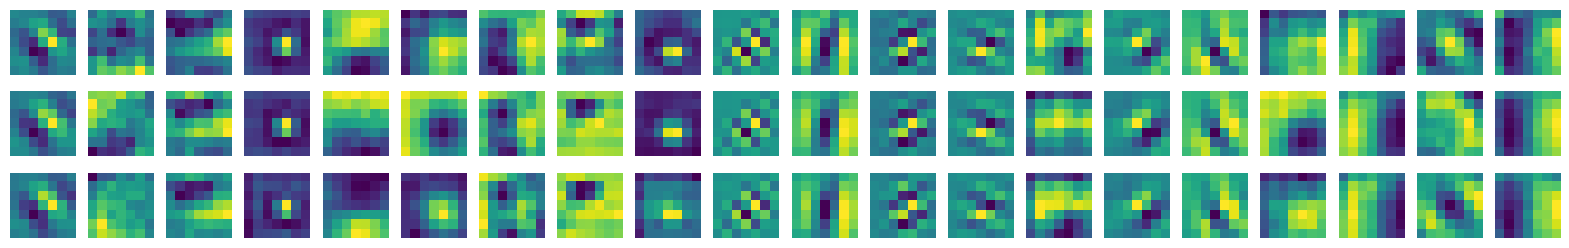

In [23]:
# Specify the model name and path
model_name = "resnet"  # Change to "alexnet", "vgg", or "resnet"


# Load the model
model = load_model_by_name(model_name, file_path)

# Get the layer indices for Conv2D layers
def get_conv2d_layer_indices(model):
    return [i for i, layer in enumerate(model.layers) if isinstance(layer, tf.keras.layers.Conv2D)]

# Example: Visualize the first 20 kernels of the first Conv2D layer
conv2d_layers = get_conv2d_layer_indices(model)
if len(conv2d_layers) > 0:
    visualize_kernels(model, conv2d_layers[0])

# Example: Visualize the first 20 kernels of the second Conv2D layer, if it exists
#if len(conv2d_layers) > 1:
#    visualize_kernels(model, conv2d_layers[1])